#Q1
#link:https://chatgpt.com/share/66fc70d1-6da4-8009-aaf0-5ca06a19495d

The standard deviation is the square root of the variance of a given sample of data, which measures the degree of dispersion of that sample of data; the standard error of the mean is the standard deviation of the sample mean over multiple samples, which measures the degree of dispersion of the sample mean.

#Q2
#link:https://chatgpt.com/share/66feeb10-01d4-8009-8374-2a3c1e79c0d4
Calculate the SEM
Calculate the margin of error 
Calculate the upper and lower bounds of the confidence interval by adding or subtracting the margin of error from the sample mean.
The final confidence interval will estimate the range in which the true overall mean is likely to fall with 95% confidence.

#Q3
#link:https://chatgpt.com/share/66feec8f-7074-8009-b252-2ba2937ef8e5
Generate bootstrapped samples
Sort the means
Find percentiles

In [1]:
#Q4
#link:
import numpy as np

def bootstrap_ci(data, num_bootstrap_samples=10000, ci_percentile=95, statistic=np.mean):
    """
    Compute the bootstrap confidence interval for a given statistic.
    
    Parameters:
    data (array-like): The sample data from which to bootstrap.
    num_bootstrap_samples (int): The number of bootstrap samples to generate (default 10,000).
    ci_percentile (float): The confidence interval level (default 95%).
    statistic (function): The statistic to compute for each bootstrap sample (default np.mean).
                          This can be changed to other functions, e.g., np.median.

    Returns:
    tuple: Lower and upper bounds of the confidence interval.
    """
    bootstrap_stats = [statistic(np.random.choice(data, size=len(data), replace=True)) 
                       for _ in range(num_bootstrap_samples)]
    
    sorted_stats = np.sort(bootstrap_stats)
    
    lower_bound = np.percentile(sorted_stats, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(sorted_stats, 100 - (100 - ci_percentile) / 2)
    
    return lower_bound, upper_bound

data_sample = np.random.normal(loc=0, scale=1, size=100)

mean_ci = bootstrap_ci(data_sample)
print(f"95% CI for the population mean: {mean_ci}")

median_ci = bootstrap_ci(data_sample, statistic=np.median)
print(f"95% CI for the population median: {median_ci}")


The statistic parameter in the bootstrap_ci function can be changed to any function like np.median or np.std to compute confidence intervals for different statistics.
The default statistic is np.mean, which calculates the bootstrap confidence interval for the mean.
Change the num_bootstrap_samples to increase or decrease the number of bootstrap samples (more samples give a more stable interval but take longer to compute).


95% CI for the population mean: (-0.48342794177732706, -0.05993896690725139)
95% CI for the population median: (-0.5693847016355749, 0.05150776381314939)


#5
#link：https://chatgpt.com/share/66feec8f-7074-8009-b252-2ba2937ef8e5

Overall parameters, which are statistical indicators that describe the situation of an overall population. A statistic is, a parameter is the number of quantities calculated from the whole totality, which can describe the situation of a set of data. The parameter represents the characteristics of the whole population and it is a constant. A statistic represents a characteristic of the sample, it is a variable that changes as the sample changes.


#6

1.For each sample that is selected, it is equivocally possible for it to be selected again and put back into the set.

2.Observe trends in data with little overall knowledge, but not representative of the data set, suitable for analyzing only a small amount of data.

3.Create many bootstrap samples from the original samples by replacing the resamples. For each resample, compute the mean and then use the distribution of these means to construct an interval. If the hypothesized mean is within this interval, it may be reasonable; if not, it suggests that the guess may be inaccurate.


#7
#link:https://chatgpt.com/share/66feec8f-7074-8009-b252-2ba2937ef8e5

A confidence interval overlapping zero indicates the possibility of no effect, meaning we fail to reject the null hypothesis. If the confidence interval does not overlap zero, it suggests the effect is likely different from zero, leading us to reject the null hypothesis and conclude that the effect is likely real.


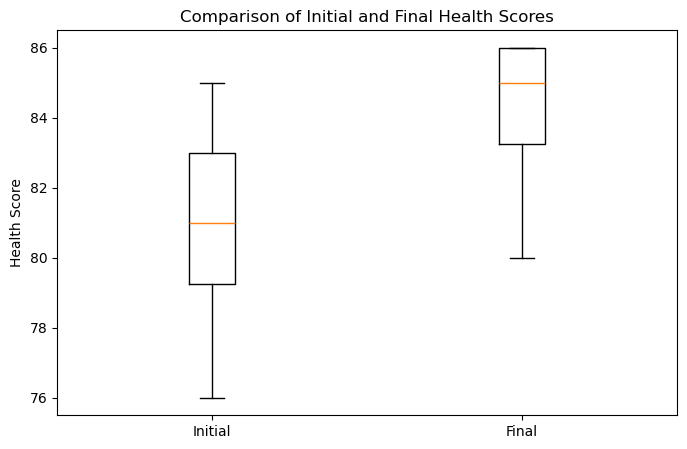

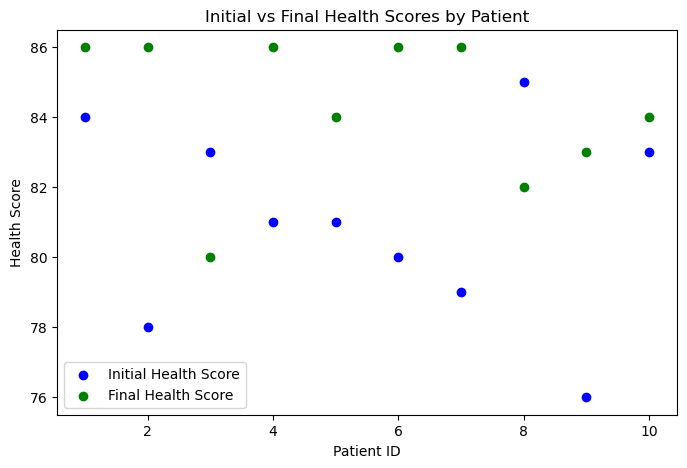

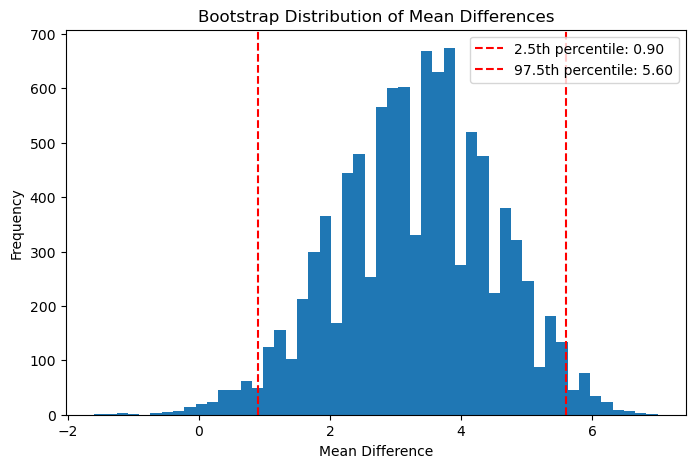

In [8]:
#Q8

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


np.random.seed(42)

data = pd.DataFrame({
    'PatientID': range(1, 11),
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})
data.to_csv('vaccine_data.csv', index=False)

plt.figure(figsize=(8, 5))
plt.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], labels=['Initial', 'Final'])
plt.title('Comparison of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(data['PatientID'], data['InitialHealthScore'], label='Initial Health Score', color='blue')
plt.scatter(data['PatientID'], data['FinalHealthScore'], label='Final Health Score', color='green')
plt.title('Initial vs Final Health Scores by Patient')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.legend()
plt.show()

data['Difference'] = data['FinalHealthScore'] - data['InitialHealthScore']


n_iterations = 10000
boot_means = []

for _ in range(n_iterations):
    sample = data['Difference'].sample(frac=1, replace=True)
    boot_means.append(sample.mean())


confidence_interval = np.percentile(boot_means, [2.5, 97.5])


plt.figure(figsize=(8, 5))
plt.hist(boot_means, bins=50)
plt.axvline(confidence_interval[0], color='r', linestyle='dashed', label=f'2.5th percentile: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='r', linestyle='dashed', label=f'97.5th percentile: {confidence_interval[1]:.2f}')
plt.title('Bootstrap Distribution of Mean Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()